C:\Users\carlo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


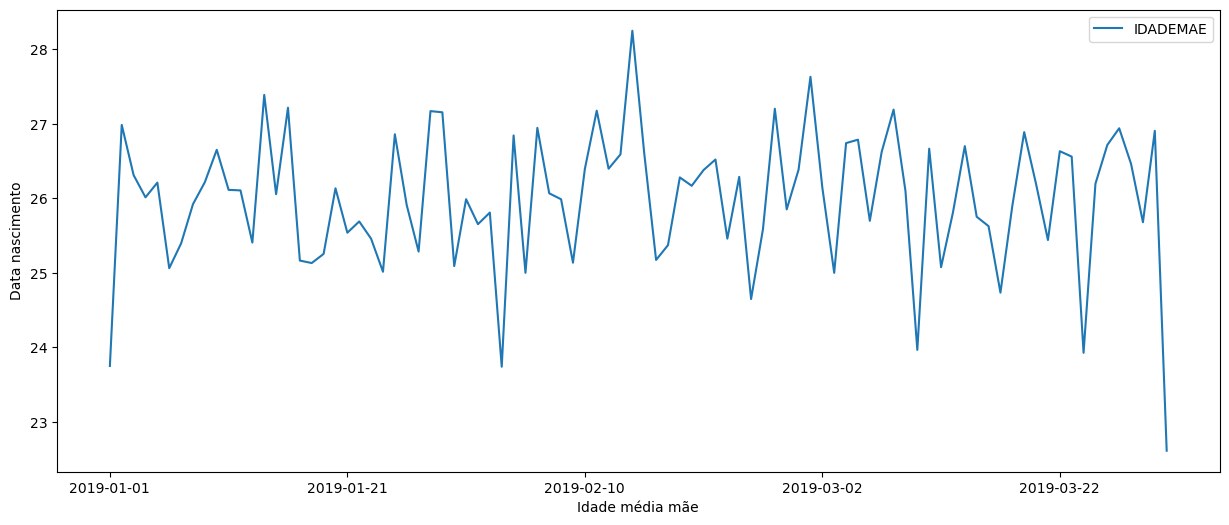

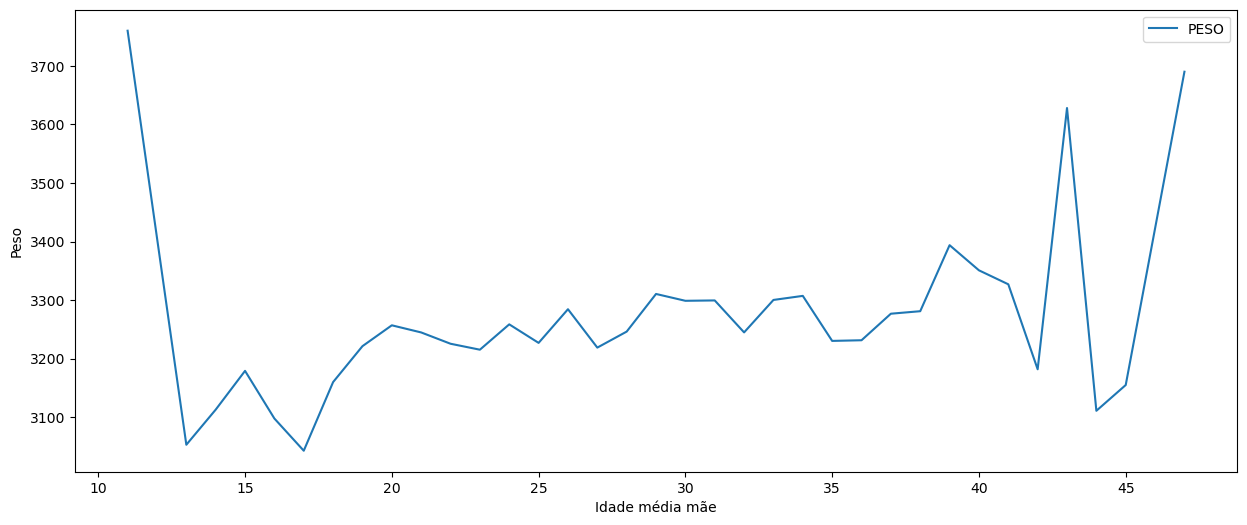

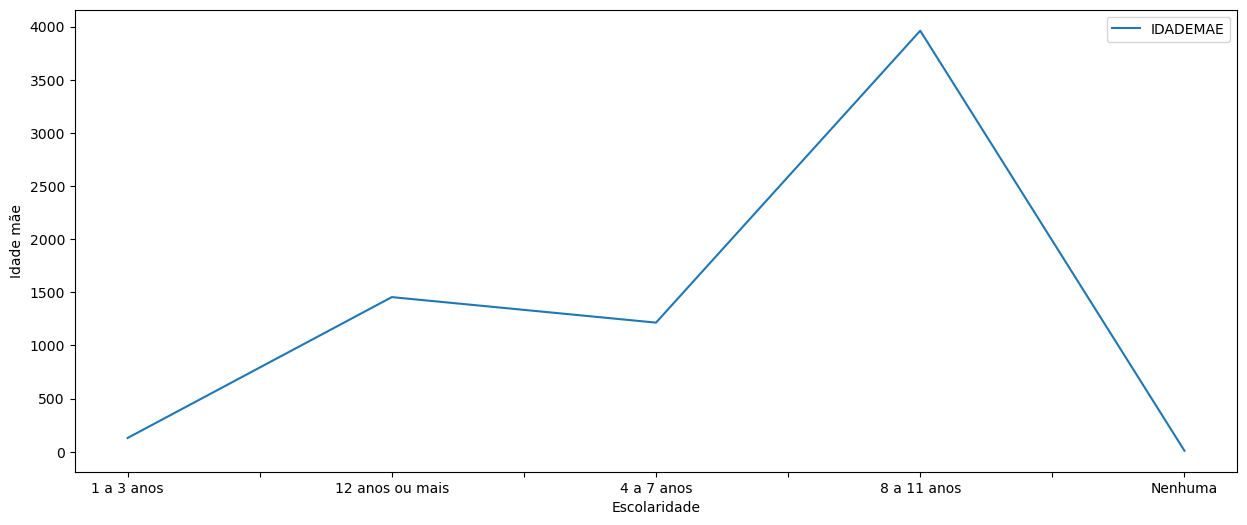

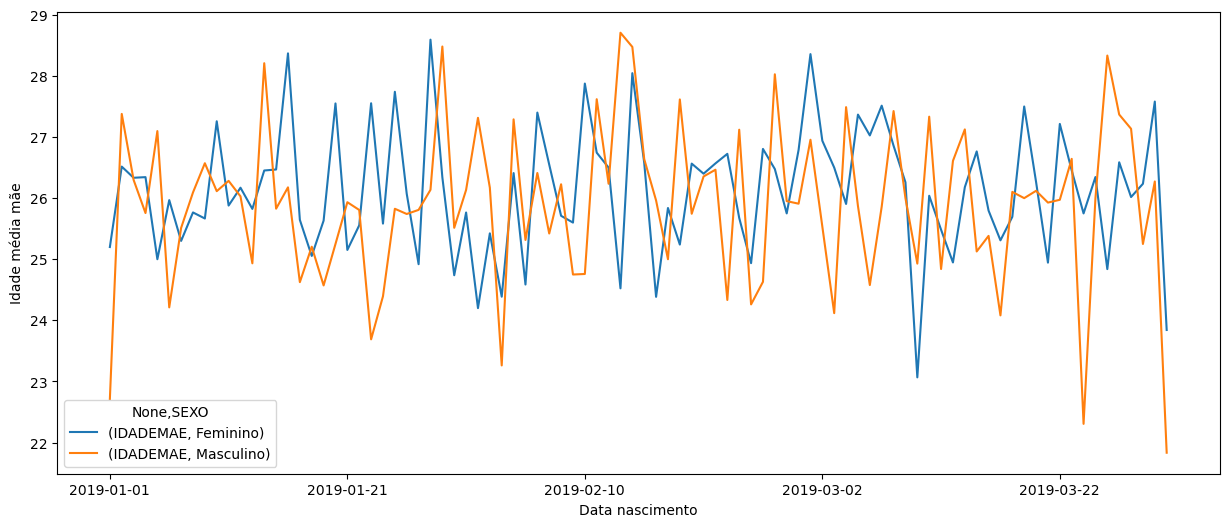

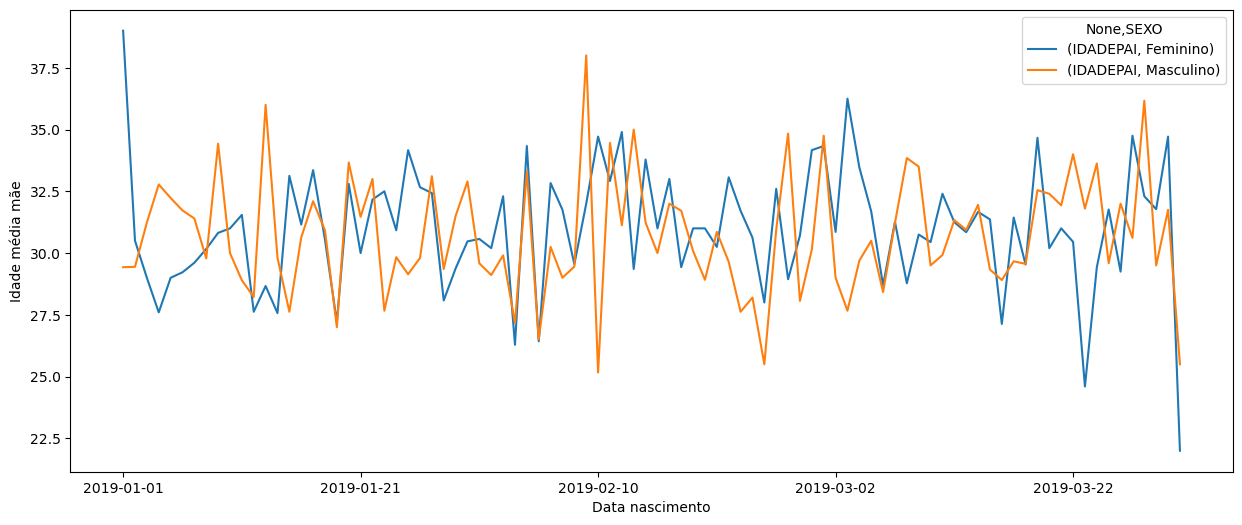

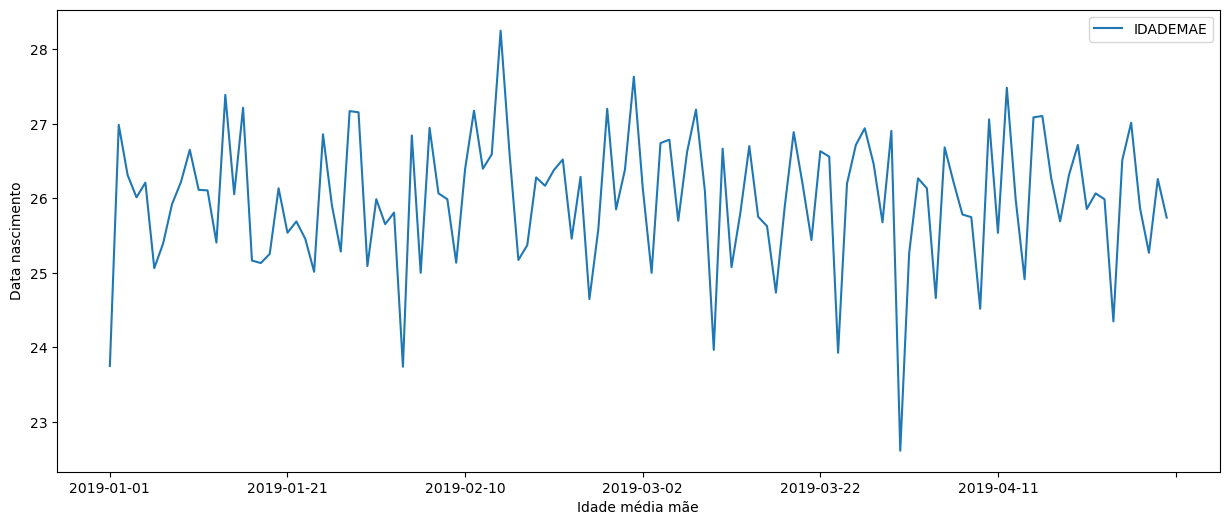

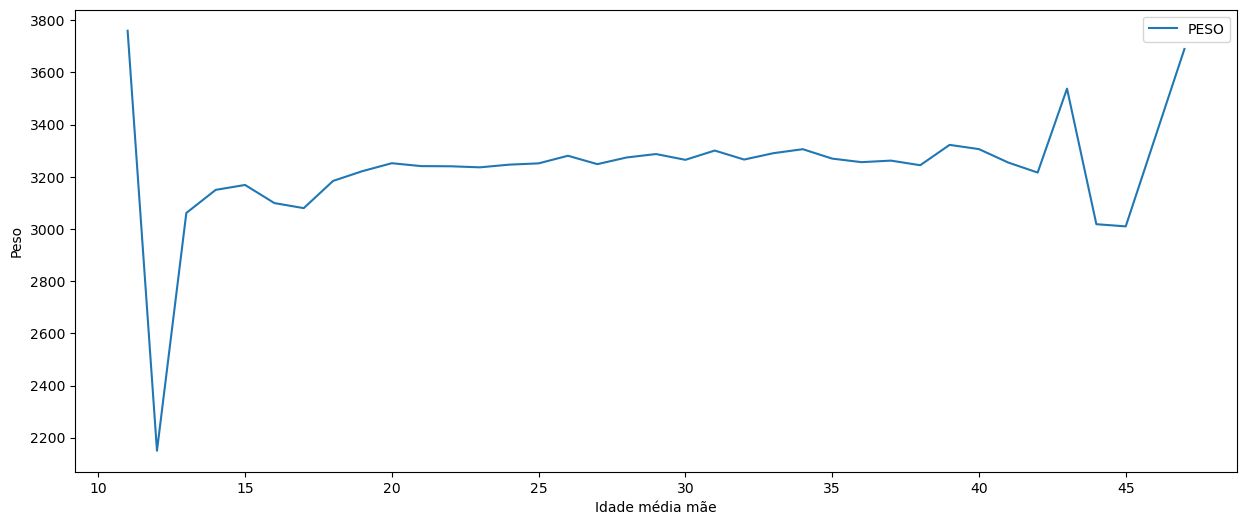

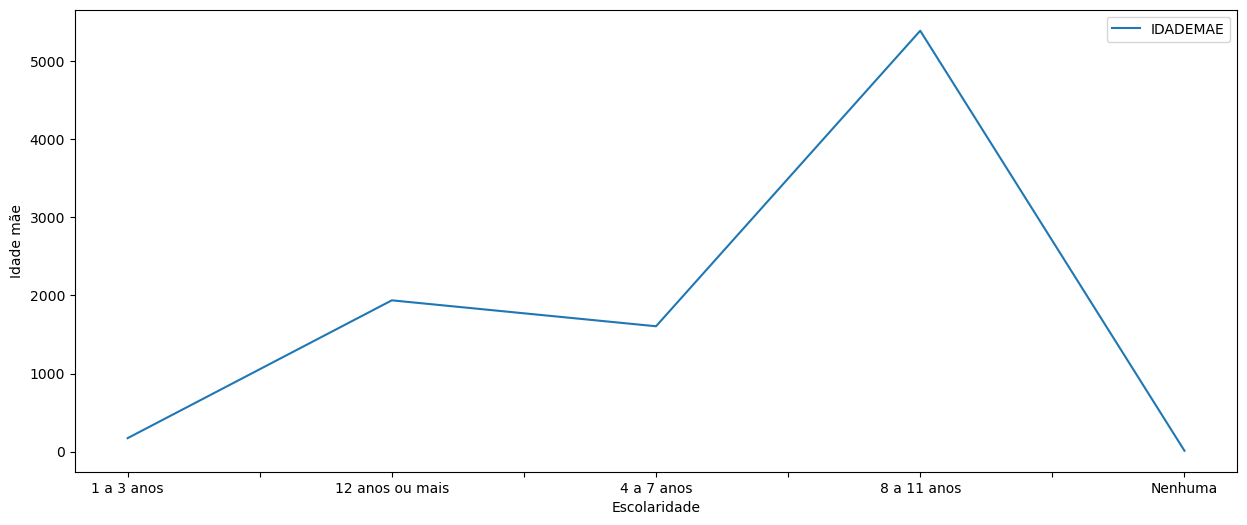

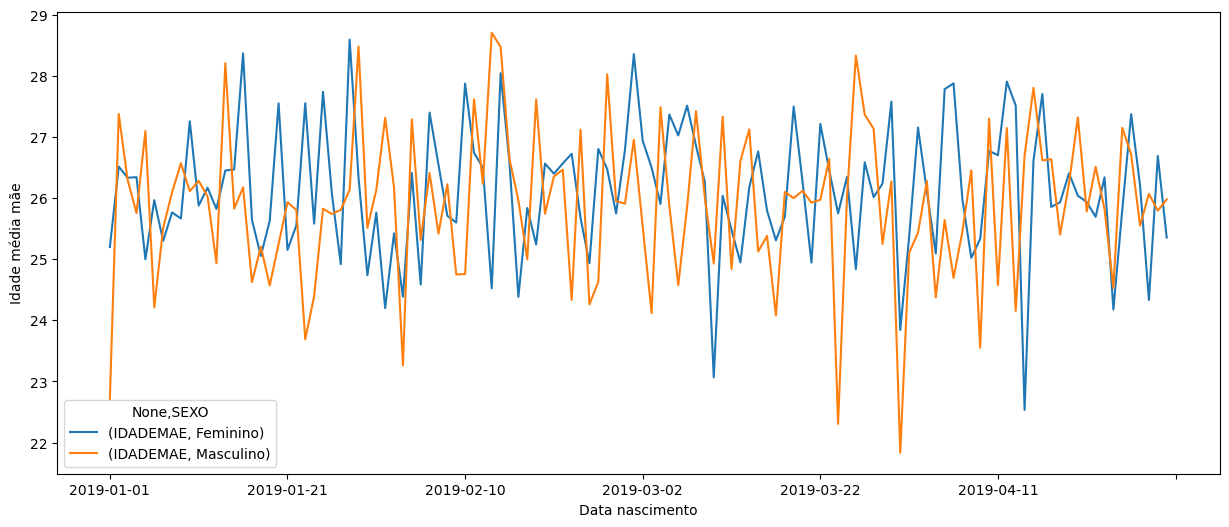

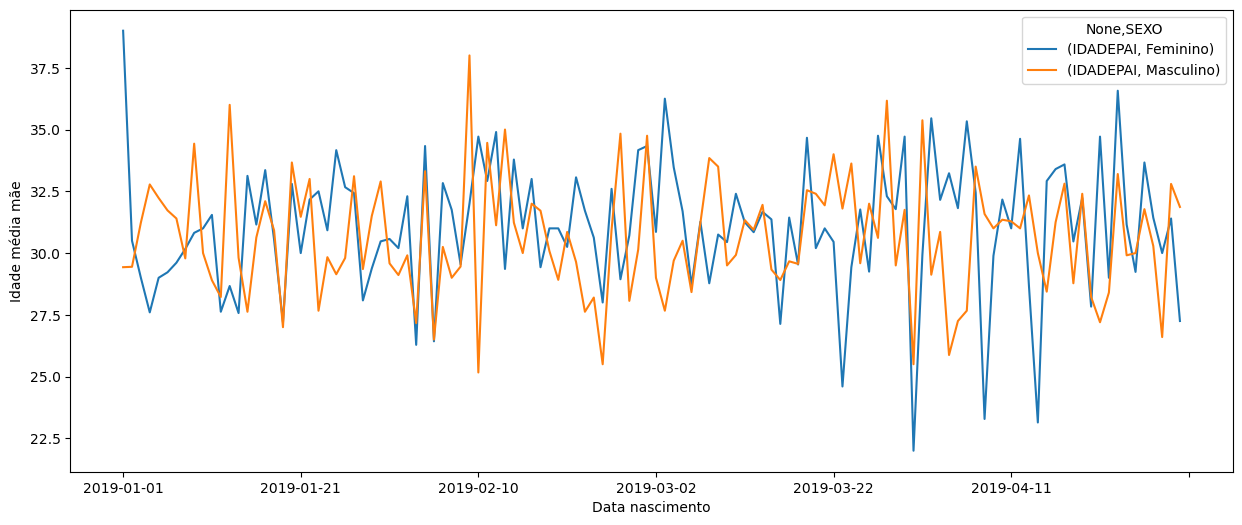

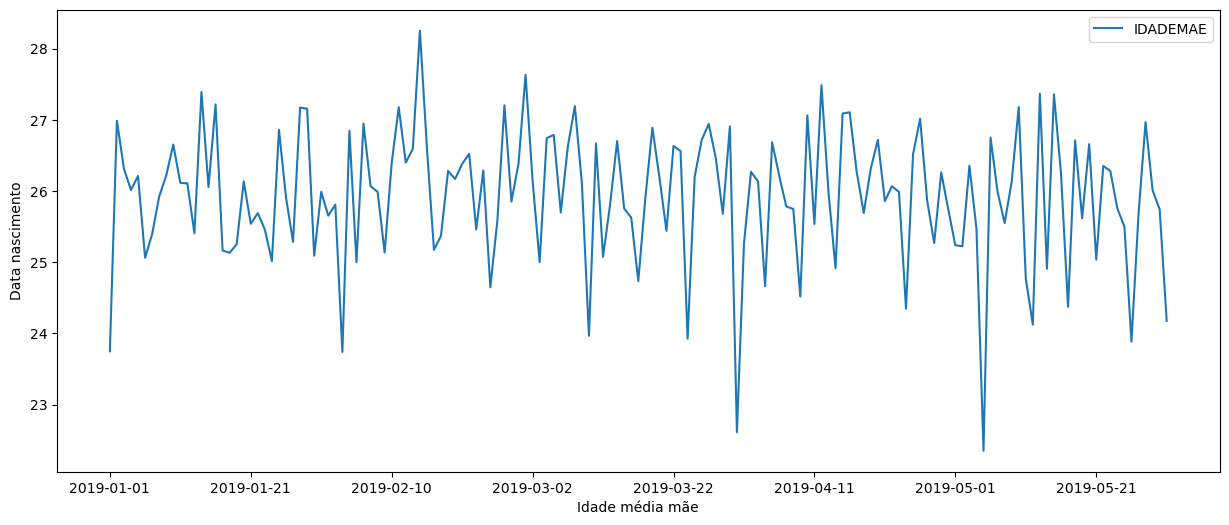

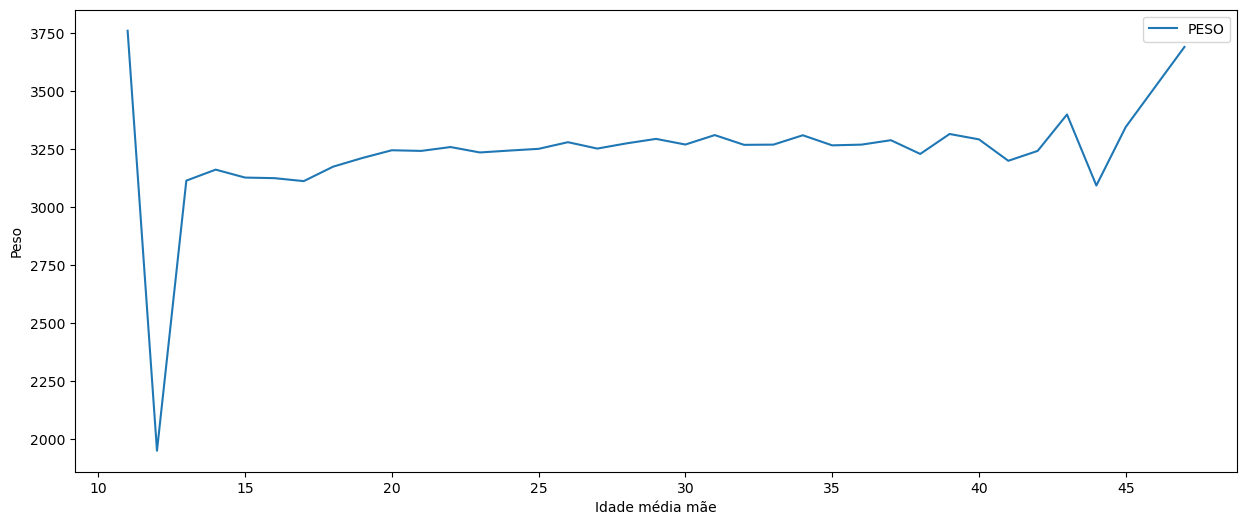

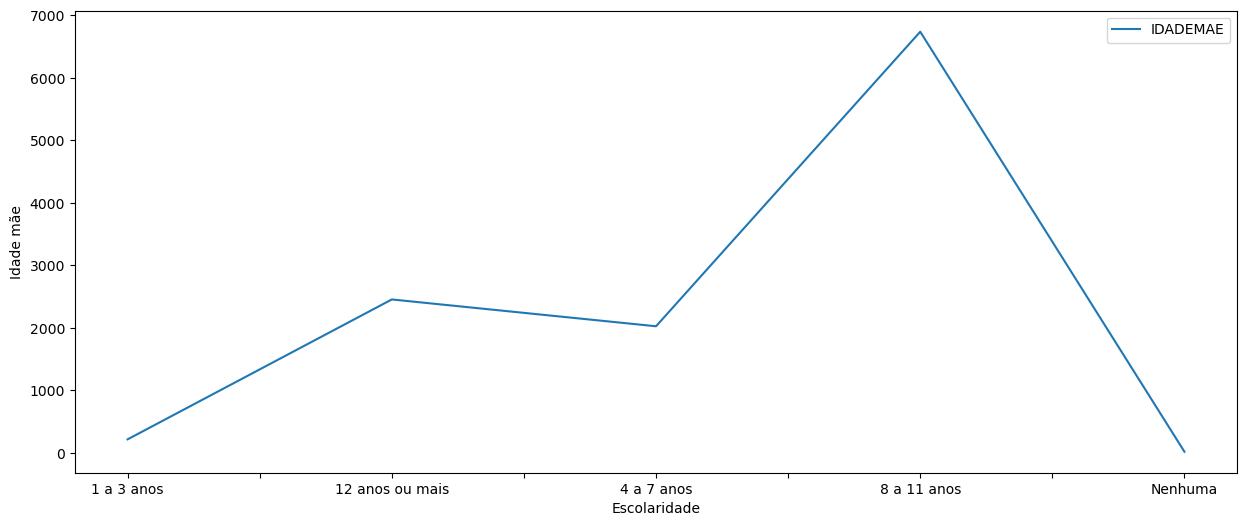

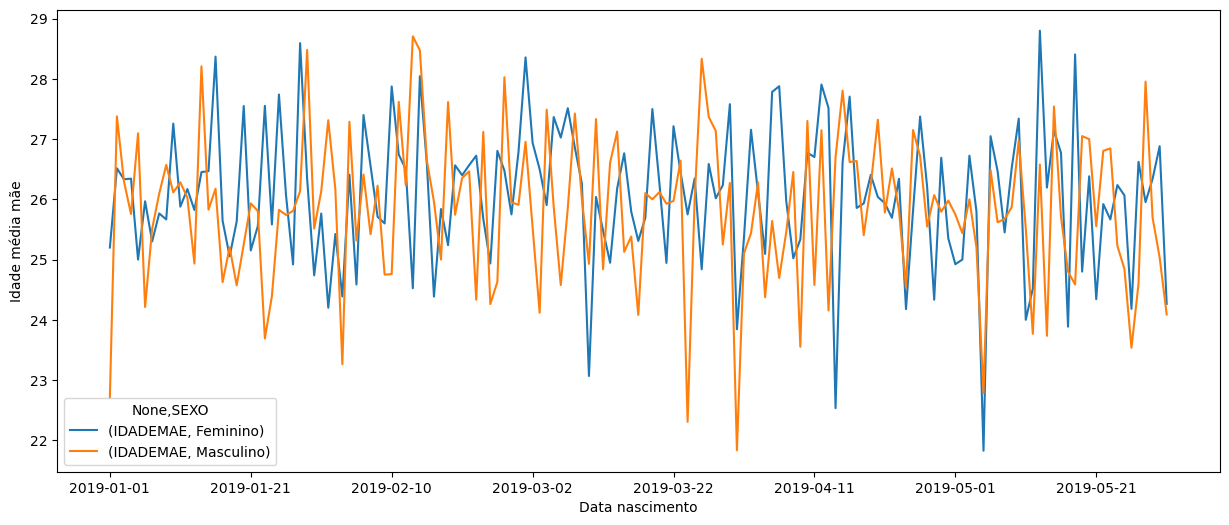

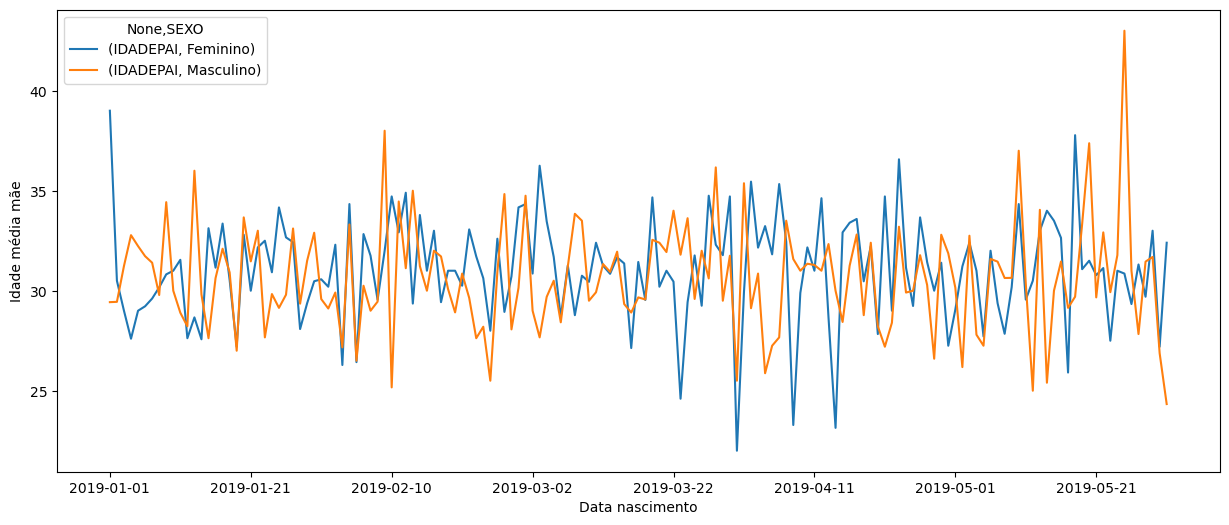

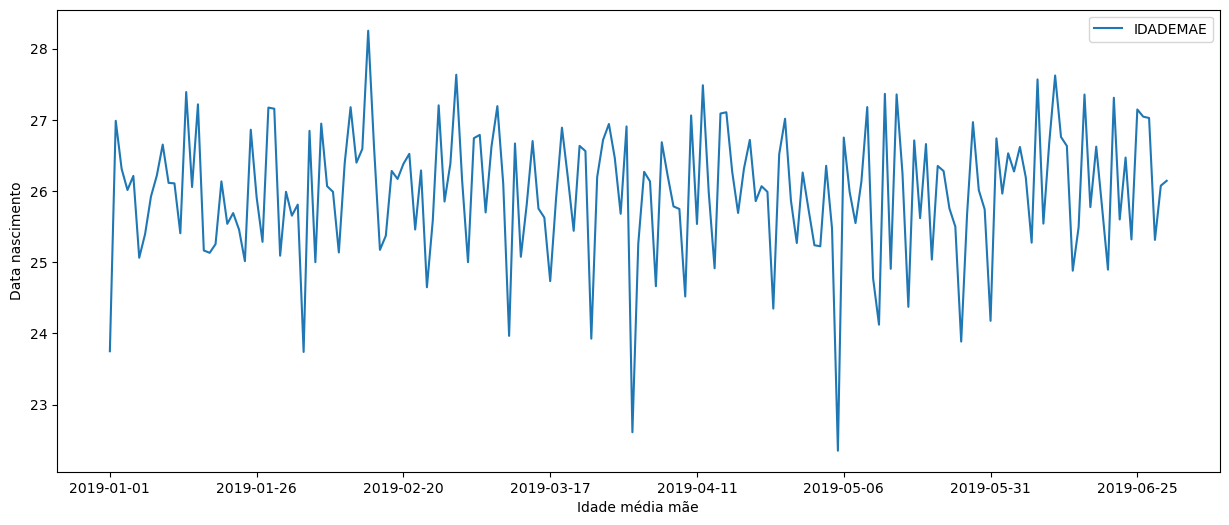

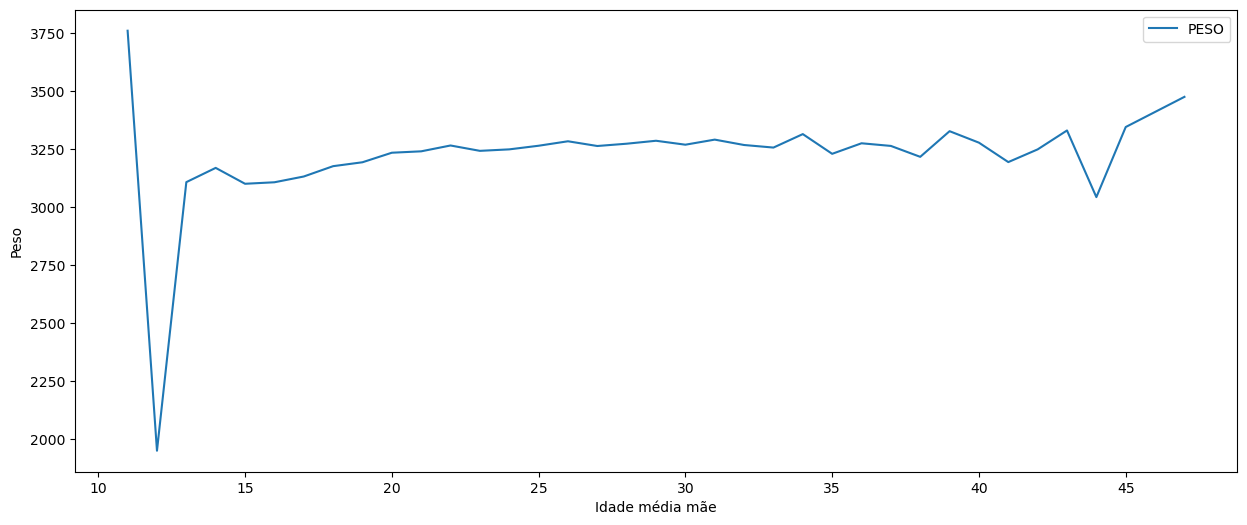

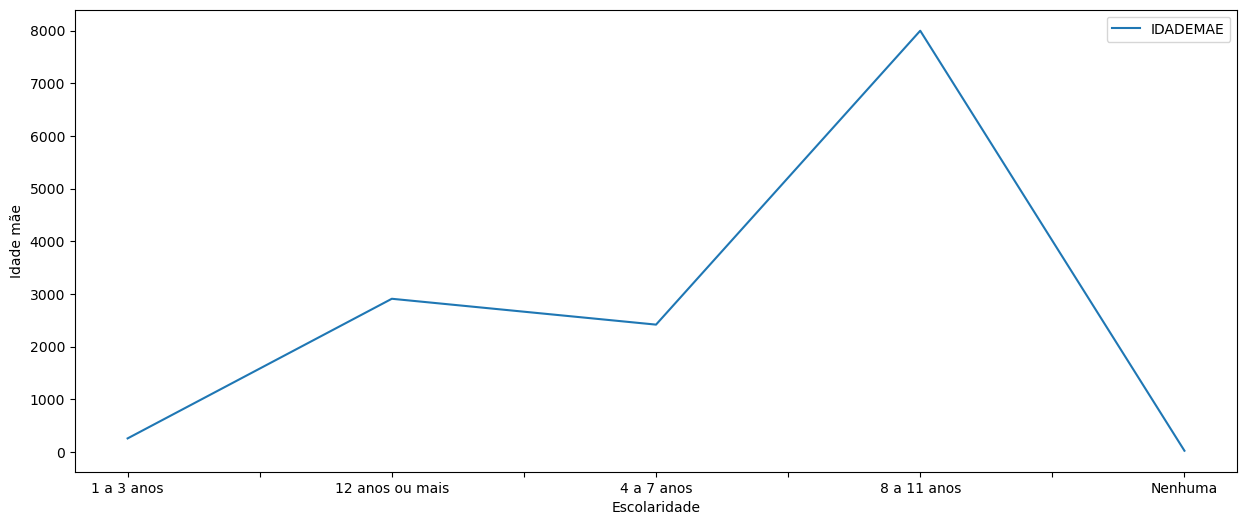

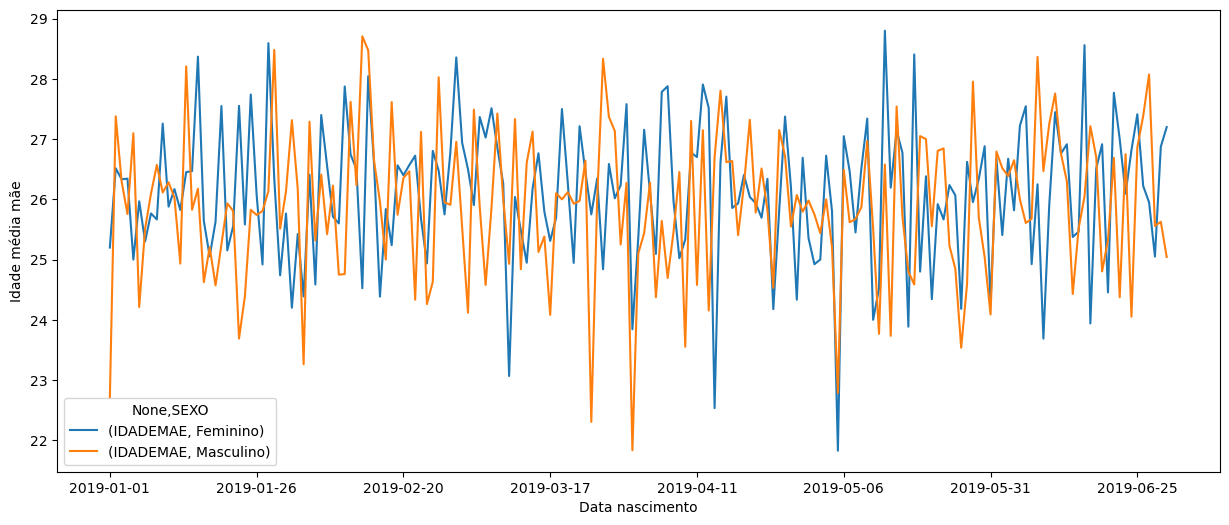

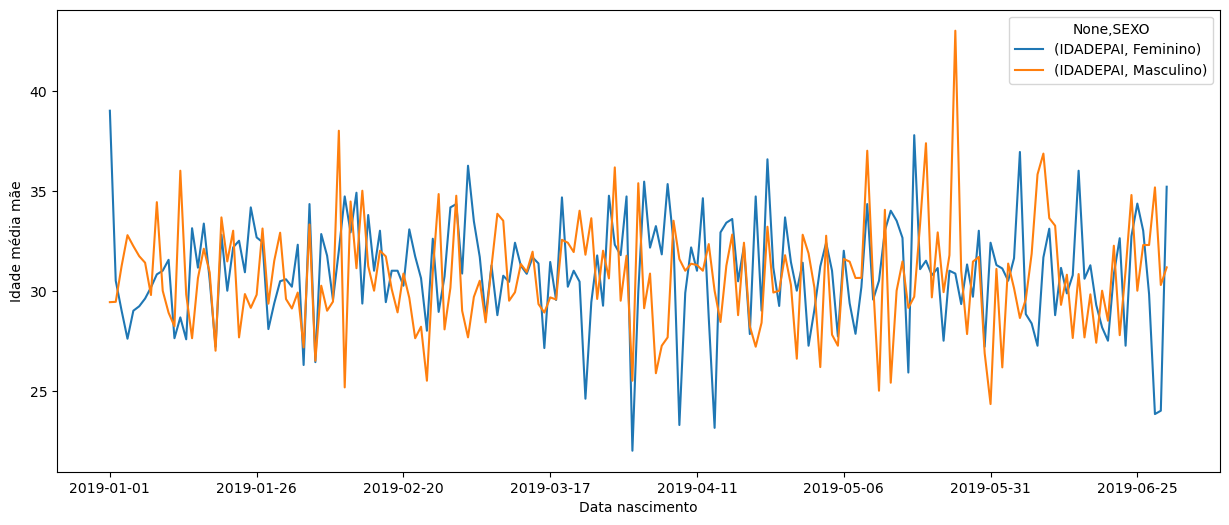

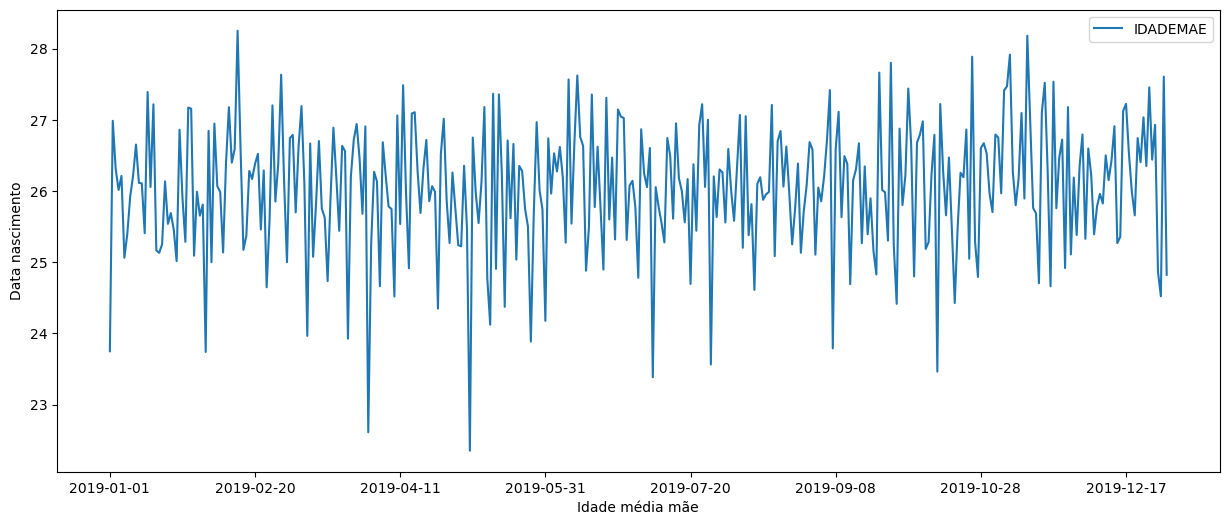

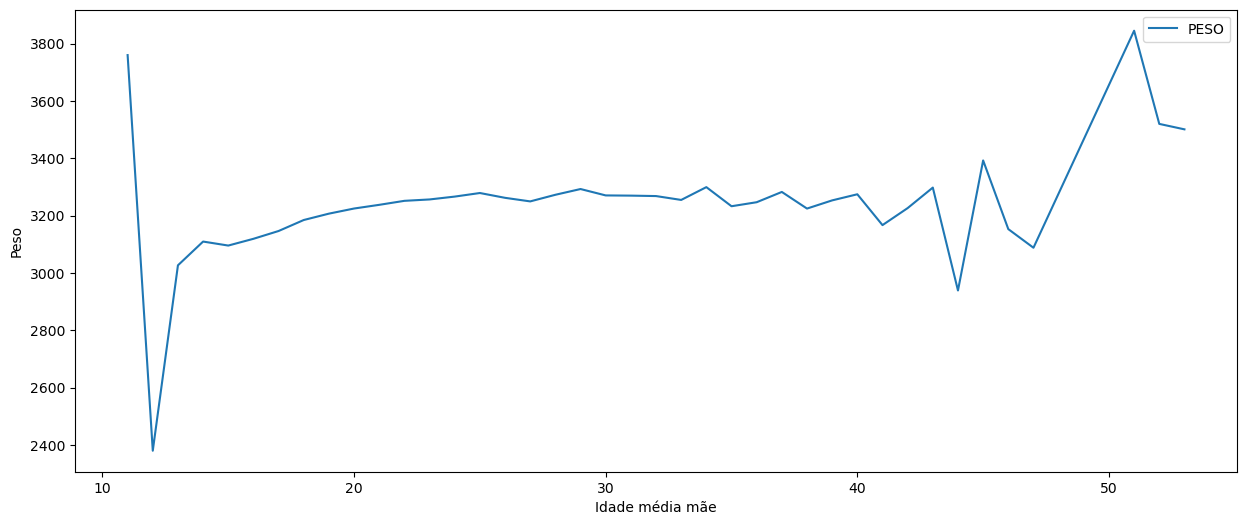

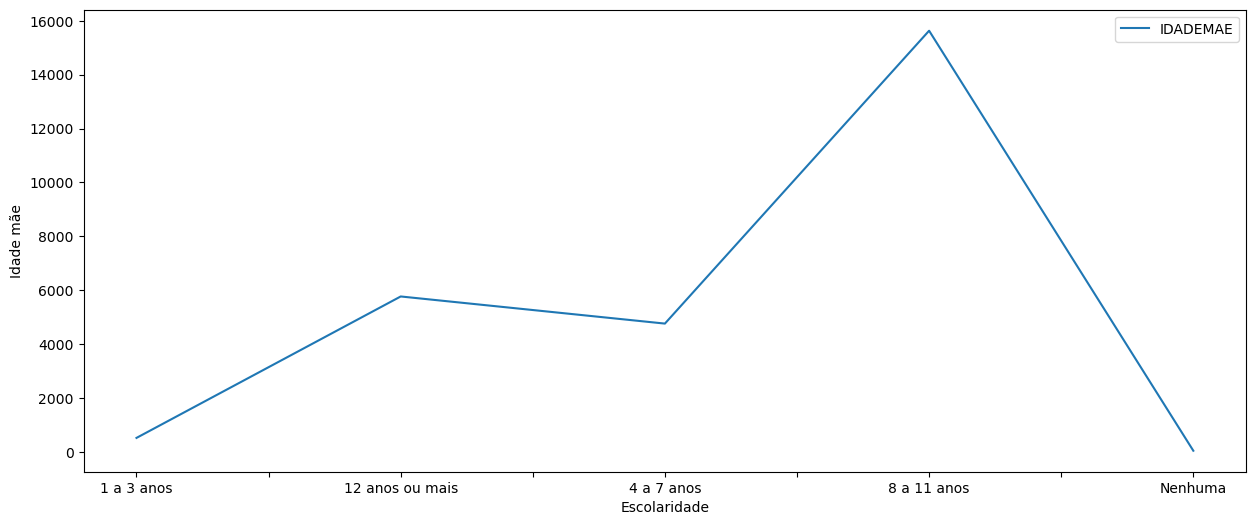

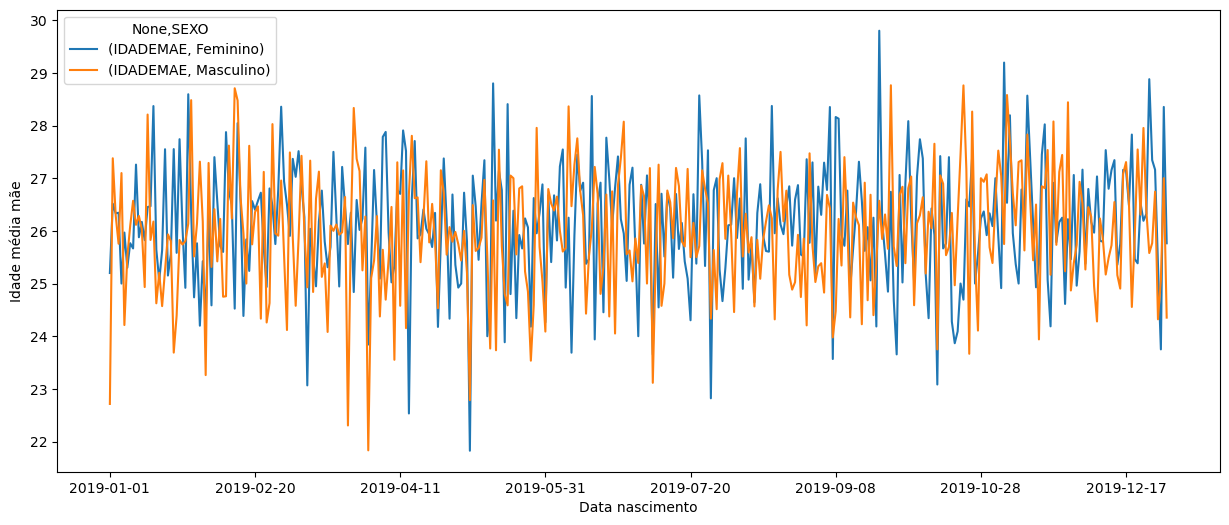

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

months = ['MAR','ABR','MAI','JUN','DEZ']



def plot_info(df, value, index, agg, ylabel, xlabel, opcao=None):
    if opcao == None:
        pd.pivot_table(df, values= value, index= index, aggfunc= agg).plot(figsize=(15,6))
    elif opcao == 'unstack':
        pd.pivot_table(df, values= value, index= index, aggfunc= agg).unstack().plot(figsize=(15,6))
    elif opcao == 'sort':
        pd.pivot_table(df, values= value, index= index, aggfunc= agg).sort_values(value).plot(figsize=(15,6))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return None



for month in months:
    for s in os.listdir('./input'):
        if s.split('.')[0].endswith(month) == True:
            
            df = pd.read_csv('./input/' + s)
            
            os.makedirs('./output/figs/'+ df.DTNASC.max())
            
            plot_info(df, 'IDADEMAE', 'DTNASC', 'mean', 'Data nascimento', 'Idade média mãe')
            plt.savefig('./output/figs/'+ df.DTNASC.max() + '/Idade média mãe por nascimento.png')

            plot_info(df, 'PESO', 'IDADEMAE', 'mean', 'Peso', 'Idade média mãe' )
            plt.savefig('./output/figs/'+ df.DTNASC.max() + '/Peso médio por idade mãe.png')

            plot_info(df, 'IDADEMAE', 'ESCMAE', 'count', 'Idade mãe', 'Escolaridade' )
            plt.savefig('./output/figs/'+ df.DTNASC.max() + '/Escolaridade por idade mãe.png')

            plot_info(df, 'IDADEMAE', ['DTNASC','SEXO'], 'mean', 'Idade média mãe', 'Data nascimento', 'unstack')
            plt.savefig('./output/figs/'+ df.DTNASC.max() + '/Idade média mãe por data de nascimento para cada sexo.png')

            plot_info(df, 'IDADEPAI', ['DTNASC','SEXO'], 'mean', 'Idade média mãe', 'Data nascimento', 'unstack')
            plt.savefig('./output/figs/'+ df.DTNASC.max() + '/Idade média pai por data de nascimento para cada sexo.png')
                       